In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
import tensorflow as tf

### Data preparation

In [163]:
x_data = np.linspace(0.0, 10.0, 1000000)

### The real form of y will be y = 0.5x + 5 with some noise

In [164]:
y_true = (0.5 * x_data) + 5 + noise

### Create data frame for x,y

In [165]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [166]:
y_df = pd.DataFrame(data=y_true, columns=["Y"])

In [167]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [168]:
y_df.head()

,Y
0,4.317463
1,5.189191
2,5.073460
3,4.092838
4,5.878586


In [169]:
my_data = pd.concat([x_df, y_df], axis=1)

In [170]:
my_data.head()

,X Data,Y
0,0.00000,4.317463
1,0.00001,5.189191
2,0.00002,5.073460
3,0.00003,4.092838
4,0.00004,5.878586


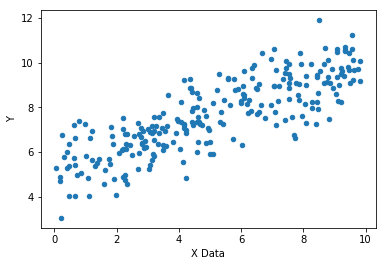

In [171]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

### Optimization process

In [172]:
np.random.randn(2)

array([-0.43160409,  0.72405314])

In [173]:
m = tf.Variable(1.43)
b = tf.Variable(2.04)

### Create batches of data

In [174]:
batch_size = 8

In [175]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

### Hypothesis model prediction

In [176]:
y_model = m*xph + b

### Building lost function

In [177]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [178]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train= optimizer.minimize(error)

In [179]:
init = tf.global_variables_initializer()

In [180]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b])    
    

In [181]:
model_m

0.50240546

In [182]:
model_b

4.9228301

In [183]:
y_hat = x_data*model_m + model_b

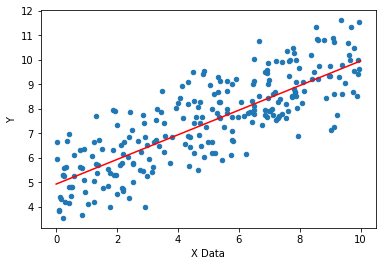

In [184]:
my_data.sample(250).plot(kind='scatter', x = 'X Data', y ='Y')
plt.plot(x_data, y_hat, 'r')